# Load Modules and Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import collections as co
import seaborn as sns

In [2]:
data = pd.read_excel('default of credit card clients.xls')

In [3]:
data.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
colname = data.loc['ID']
data = data.drop(['ID'])
data.columns=colname
data.head(5)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data Exploration and Preprocessing

### Data Size and Data Type

In [5]:
print ('The data has {0} rows and {1} columns\n'.format(data.shape[0],data.shape[1]))

print("The data type of our features:\n",
     data.dtypes)

The data has 30000 rows and 24 columns

The data type of our features:
 ID
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object


### Convert the data into the correct type

In [6]:
data['LIMIT_BAL'] = data['LIMIT_BAL'].astype(float)
data['BILL_AMT1'] = data['BILL_AMT1'].astype(float)
data['BILL_AMT2'] = data['BILL_AMT2'].astype(float)
data['BILL_AMT3'] = data['BILL_AMT3'].astype(float)
data['BILL_AMT4'] = data['BILL_AMT4'].astype(float)
data['BILL_AMT5'] = data['BILL_AMT5'].astype(float)
data['BILL_AMT6'] = data['BILL_AMT6'].astype(float)
data['PAY_AMT1'] = data['PAY_AMT1'].astype(float)
data['PAY_AMT2'] = data['PAY_AMT2'].astype(float)
data['PAY_AMT3'] = data['PAY_AMT3'].astype(float)
data['PAY_AMT4'] = data['PAY_AMT4'].astype(float)
data['PAY_AMT5'] = data['PAY_AMT5'].astype(float)
data['PAY_AMT6'] = data['PAY_AMT6'].astype(float)

In [7]:
data.dtypes

ID
LIMIT_BAL                     float64
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                            object
PAY_0                          object
PAY_2                          object
PAY_3                          object
PAY_4                          object
PAY_5                          object
PAY_6                          object
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month     object
dtype: object

## Missng Value check

In [8]:
data.isnull().any()
## No missing value in this dataset

ID
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

### Check the balance of the target variable

In [9]:
cnt = co.Counter(data['default payment next month'])

In [10]:
cnt

Counter({0: 23364, 1: 6636})

In [11]:
prob = {}
for k,v in cnt.items():
        prob.update({k: v/data.shape[0]})
prob

{0: 0.7788, 1: 0.2212}

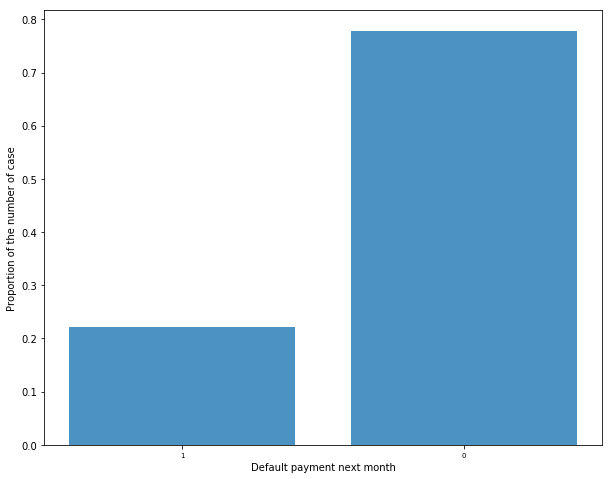

In [12]:
y_pos = np.arange(len(prob.items())) 
plt.bar(y_pos,prob.values() , align='center', alpha=0.8)
plt.xticks(y_pos, prob.keys() , fontsize = 7)
plt.ylabel('Proportion of the number of case')
plt.xlabel('Default payment next month')
plt.show()

### Separate features into numerical group and catigorical group

In [13]:
num_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])
#del cat_data['default payment next month']
#print ("There are {} numeric features and {} categorical features".format(num_data.shape[1],cat_data.shape[1]))

### Data Exploratory Analysis

#### For numerical features

#### Pearson Correlation Matrix

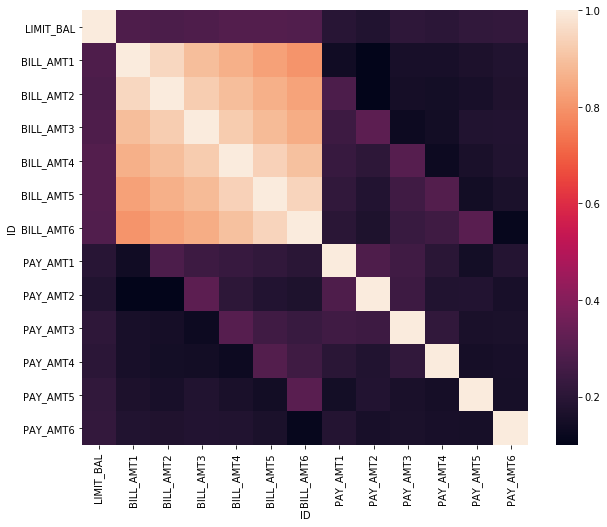

In [14]:
corr = num_data.corr()
sns.heatmap(corr)
##High correlation among BILL_AMTs features 

### For categorical features

##### Sex

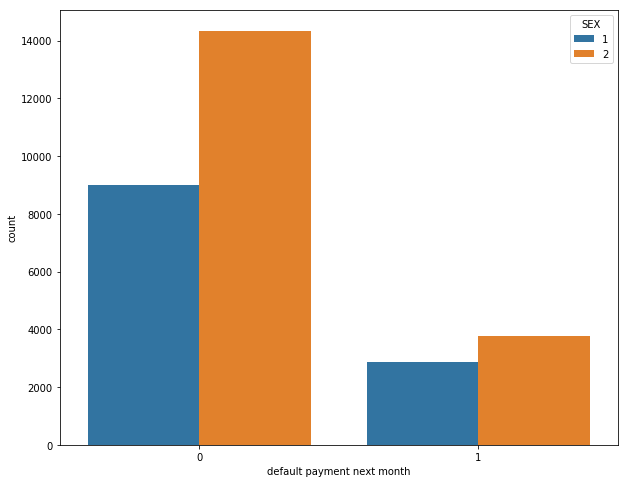

In [15]:
sns.countplot(x='default payment next month', hue = 'SEX',data=cat_data)

##### Education

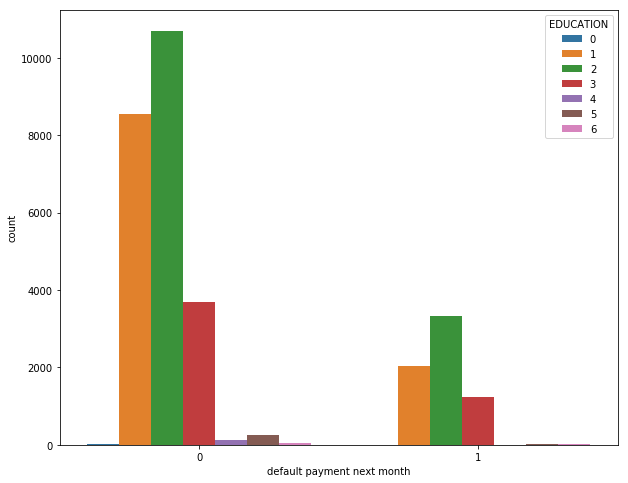

In [16]:
sns.countplot(x='default payment next month', hue = 'EDUCATION',data=cat_data)

##### Marriage

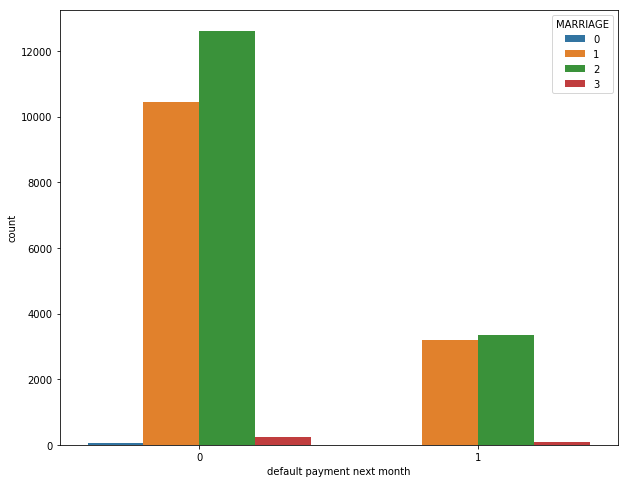

In [17]:
sns.countplot(x='default payment next month', hue = 'MARRIAGE',data=cat_data)

##### Age

In [18]:
# Break Age to three Age group
cat_data['AGE Group']=list(pd.cut(cat_data['AGE'], 3, retbins=True)[0])

/Users/lingyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


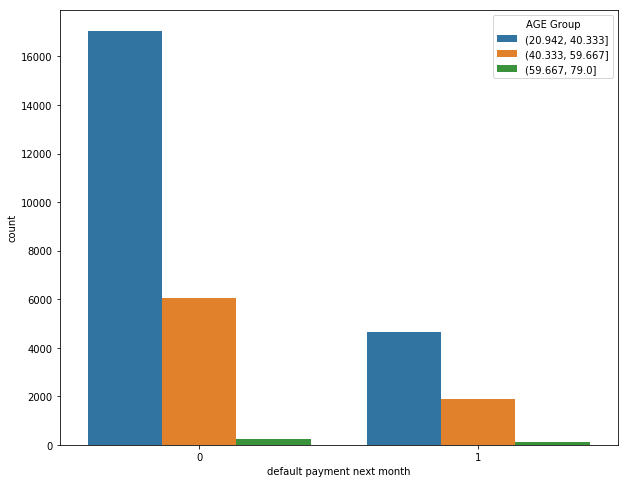

In [19]:
sns.countplot(x='default payment next month', hue = 'AGE Group',data=cat_data)